In [2]:
import os
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nipes_data_fcts as nidf
import me_data_fcts as medf
from statannotations.Annotator import Annotator


In [3]:
import importlib
importlib.reload(medf)

<module 'me_data_fcts' from '/home/leni/git/AREFramework/experiments/scripts/me_data_fcts.py'>

In [4]:
repo_folder = "/media/leni/DATADRIVE1/are-logs/"

In [5]:
mehk_ori_folder = repo_folder + "mehk_full/subset/"
mehk_new_folder = repo_folder + "meim_updated_encoding/"

In [10]:
parent_fits = []
for folder in os.listdir(mehk_ori_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_ori_folder + "/" + folder + "/parent_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_ori_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_ori_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data["encoding"] = "original"

meim_1_7_13-48-4-4412-2005753728
meim_28_7_15-26-15-5072-1856930231
meim_31_6_10-54-15-5808-2000983534
meim_4_6_16-59-49-9078-3493767385
meim_6_6_12-28-38-8210-1037330512


In [11]:
parent_fits = []
for folder in os.listdir(mehk_new_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_new_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = medf.load_fitness(mehk_new_folder + "/" + folder + "/fitness.csv")
    eval_times = medf.load_comp_time_dict(mehk_new_folder + "/" + folder + "/times.csv")
    fits = [[i,p[0],p[1],eval_times[i][0]/(1000000*3600),eval_times[i][1]/(1000000*3600),f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += medf.filter_to_parent_pool(fits,parent_ids)
par_fit_data2 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","parent 1","parent 2","evaluation time","time","fitness","replicate"])
par_fit_data2["encoding"] = "new"

meim_30_9_16-22-57-7185-1877475420
meim_30_9_16-22-57-7840-612027092
meim_30_9_16-23-0-817-373282062
meim_30_9_16-23-14-4870-3502289118
meim_30_9_16-23-8-8496-797224846


In [12]:
fit_data = pd.concat([par_fit_data,par_fit_data2]).reset_index(drop=True)


In [14]:
fit_max_data = []
for enc in fit_data["encoding"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["encoding"] == enc]
    for rep in tmp_data["replicate"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["replicate"] == rep]
        fit_max_data.append(pd.DataFrame(tmp_data2.max(numeric_only=True)).transpose())
        fit_max_data[-1]["replicate"] = rep
        fit_max_data[-1]["encoding"] = enc
            
fit_max_data = pd.concat(fit_max_data)
fit_max_data.index = [i for i in range(len(fit_max_data))]

# Exploration score

/tmp/ipykernel_1093415/3879954391.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["original","new"])


(array([0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 [Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95')])

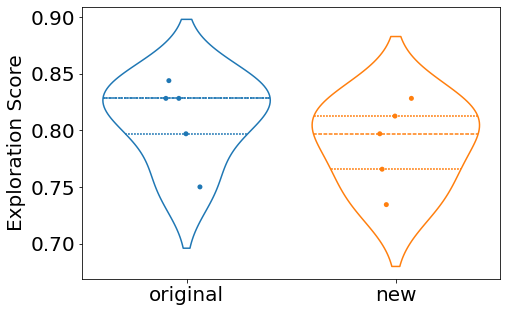

In [17]:
fig = plt.gcf()
fig.set_size_inches(7.5,5)
ax = sns.violinplot(fit_max_data,x="encoding",hue="encoding",y="fitness",fill=False,inner="quart")
sns.stripplot(fit_max_data,x="encoding",hue="encoding",y="fitness")
ax.set_xlabel("")
ax.set_xticklabels(["original","new"])
ax.set_ylabel("Exploration Score")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [23]:
parent_descs = []
for folder in os.listdir(mehk_ori_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_ori_folder + "/" + folder + "/parent_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_ori_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data1 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data1["encoding"] = "original"

meim_1_7_13-48-4-4412-2005753728
meim_28_7_15-26-15-5072-1856930231
meim_31_6_10-54-15-5808-2000983534
meim_4_6_16-59-49-9078-3493767385
meim_6_6_12-28-38-8210-1037330512


In [24]:
parent_descs = []
for folder in os.listdir(mehk_new_folder):
    print(folder)
    parent_ids = medf.load_parent_pool(mehk_new_folder + "/" + folder + "/parents_pool.csv")
    descriptors = medf.load_feature_descriptor(mehk_new_folder + "/" + folder + "/morph_features.csv")
    descs = [[int(d[0])] + d[1:5] + [d[5]*16,d[6]*16,d[7]*16,d[8]*16] + d[9:]  + [folder] for d in descriptors]
    parent_descs += medf.filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","skeleton norm","components norm","replicate"])
par_desc_data2["encoding"] = "new"

meim_30_9_16-22-57-7185-1877475420
meim_30_9_16-22-57-7840-612027092
meim_30_9_16-23-0-817-373282062
meim_30_9_16-23-14-4870-3502289118
meim_30_9_16-23-8-8496-797224846


In [26]:
desc_data = pd.concat([par_desc_data1,par_desc_data2]).reset_index(drop=True)


In [27]:
desc_data = pd.merge(desc_data,fit_data,how="left",on=["iteration","robot index","replicate","discretized number of robots","number of individuals","number new inds","encoding"])
desc_data = desc_data.drop_duplicates(subset=['robot index','replicate'])

# Components diversity

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

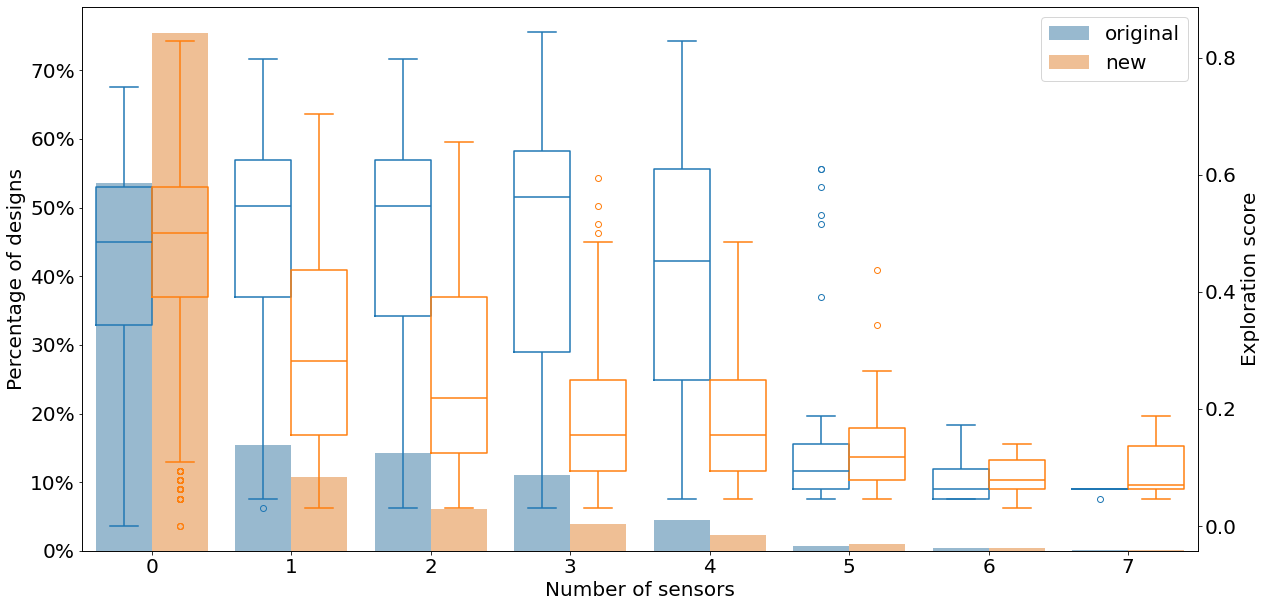

In [30]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['encoding'], desc_data['sensors'], normalize='index')
df1 = df.melt(var_name='sensors', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="sensors",y="percentage",hue="encoding",hue_order=["original","new"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["original","new"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="sensors",y="fitness",hue="encoding",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

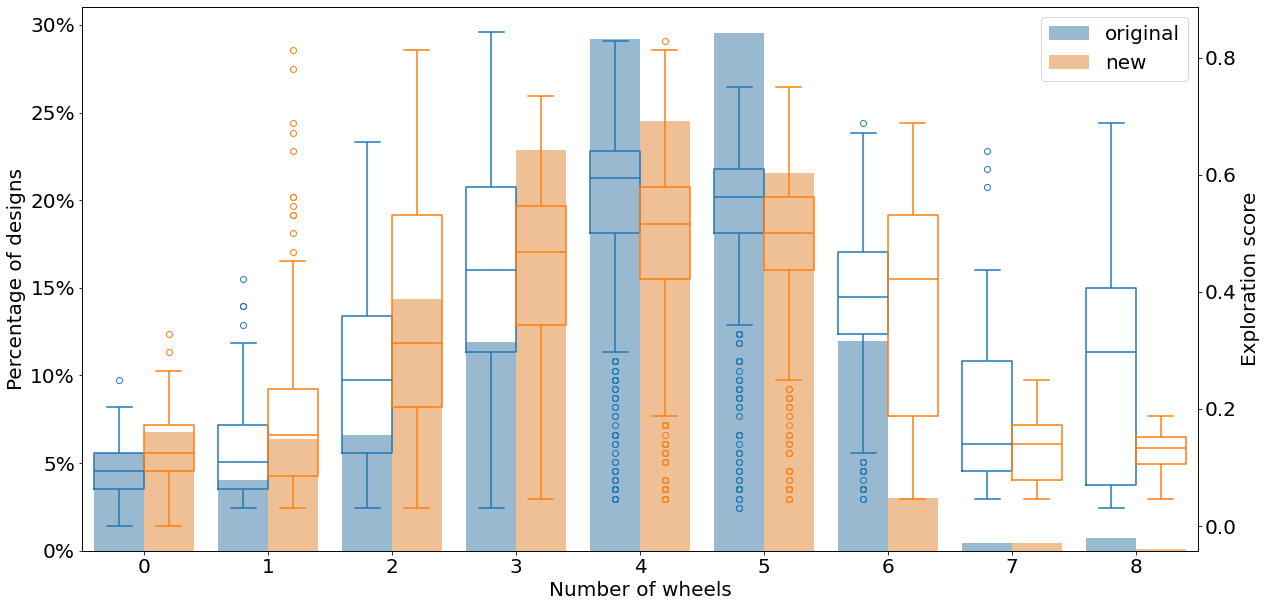

In [31]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['encoding'], desc_data['wheels'], normalize='index')
df1 = df.melt(var_name='wheels', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="wheels",y="percentage",hue="encoding",hue_order=["original","new"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["original","new"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of wheels")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="wheels",y="fitness",hue="encoding",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

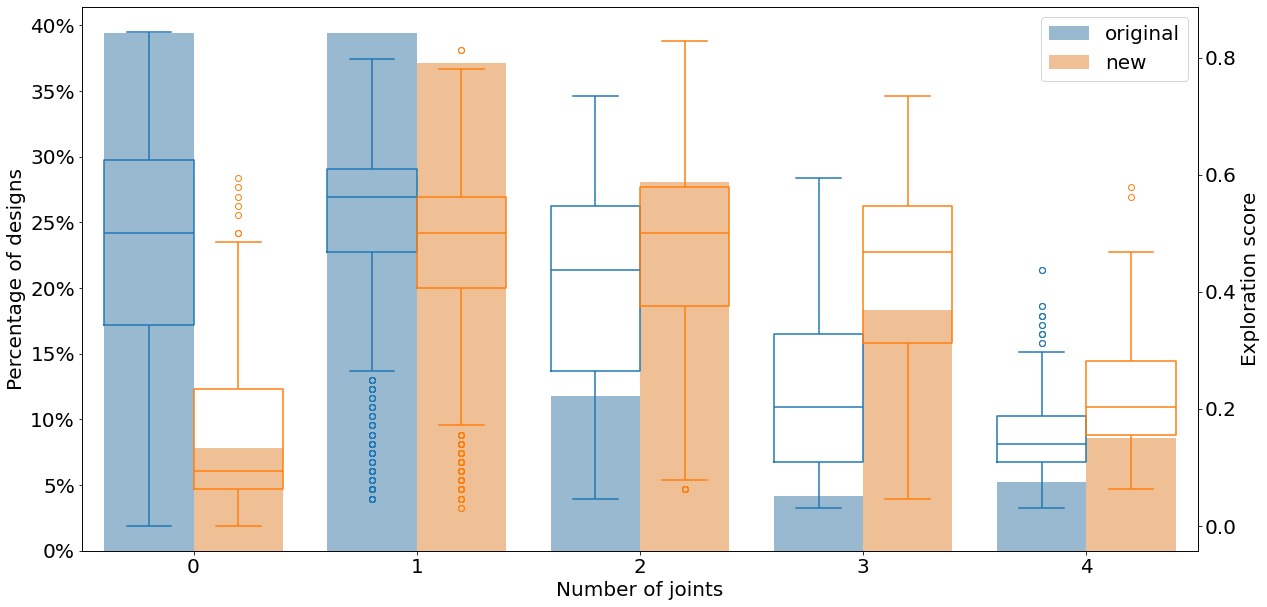

In [32]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['encoding'], desc_data['joints'], normalize='index')
df1 = df.melt(var_name='joints', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="joints",y="percentage",hue="encoding",hue_order=["original","new"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["original","new"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of joints")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="joints",y="fitness",hue="encoding",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

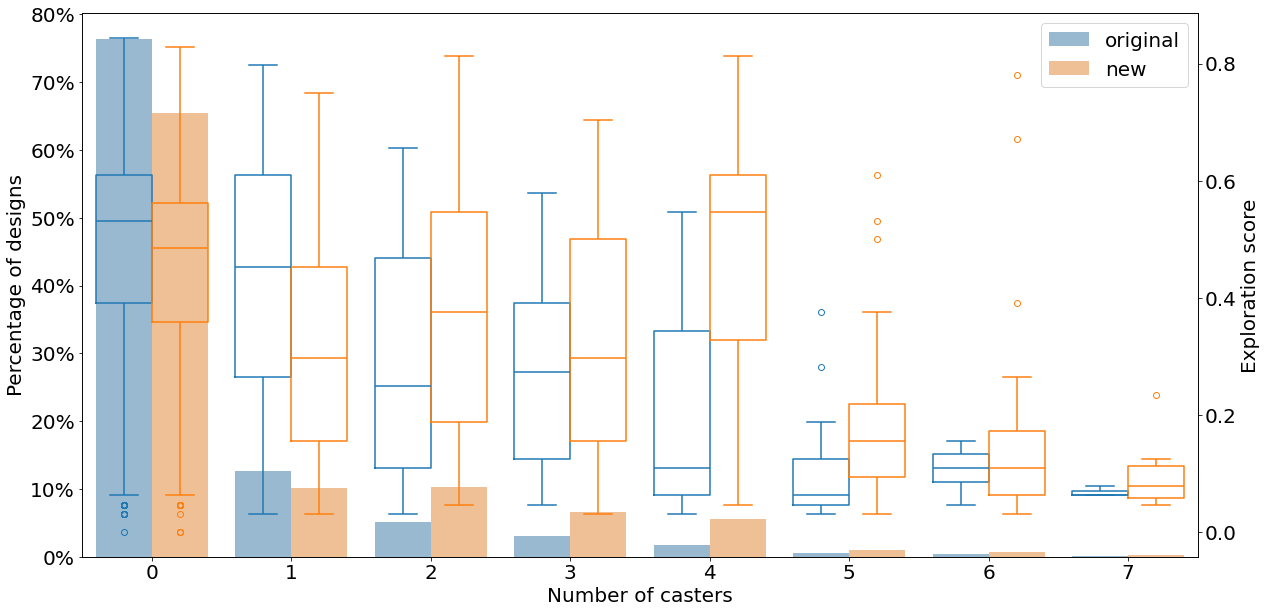

In [34]:
fig = plt.gcf()
fig.set_size_inches(20,10)
df = pd.crosstab(desc_data['encoding'], desc_data['casters'], normalize='index')
df1 = df.melt(var_name='casters', value_name='percentage', ignore_index=False).reset_index()
ax = sns.barplot(data=df1,x="casters",y="percentage",hue="encoding",hue_order=["original","new"],alpha=0.5)
ax.yaxis.label.set_size(20)
ax.yaxis.set_major_formatter('{x:.0%}')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["original","new"],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Number of casters")
ax.set_ylabel("Percentage of designs")
ax = plt.twinx()
sns.boxplot(data=desc_data,x="casters",y="fitness",hue="encoding",ax=ax,fill=False,legend=False)
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
ax.xaxis.set_major_formatter('{x:}')
plt.yticks(fontsize=20)

# Chassis diversity

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

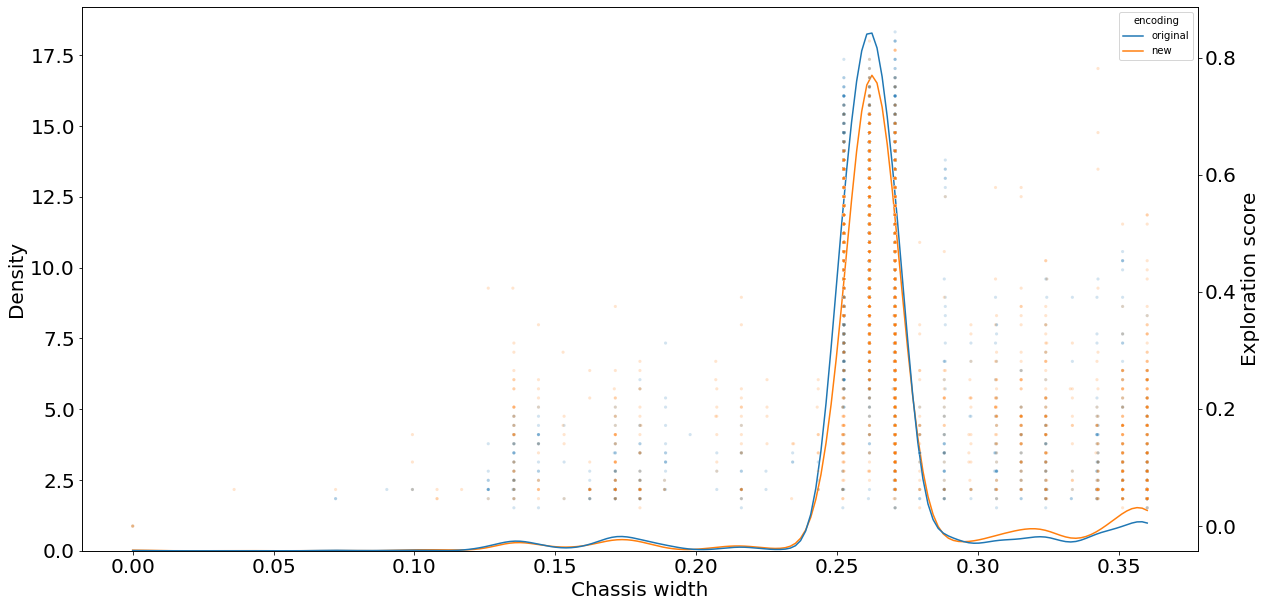

In [36]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="width",hue="encoding",cut=0,hue_order=["original","new"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis width")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="width",y="fitness",hue="encoding",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["original","new"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

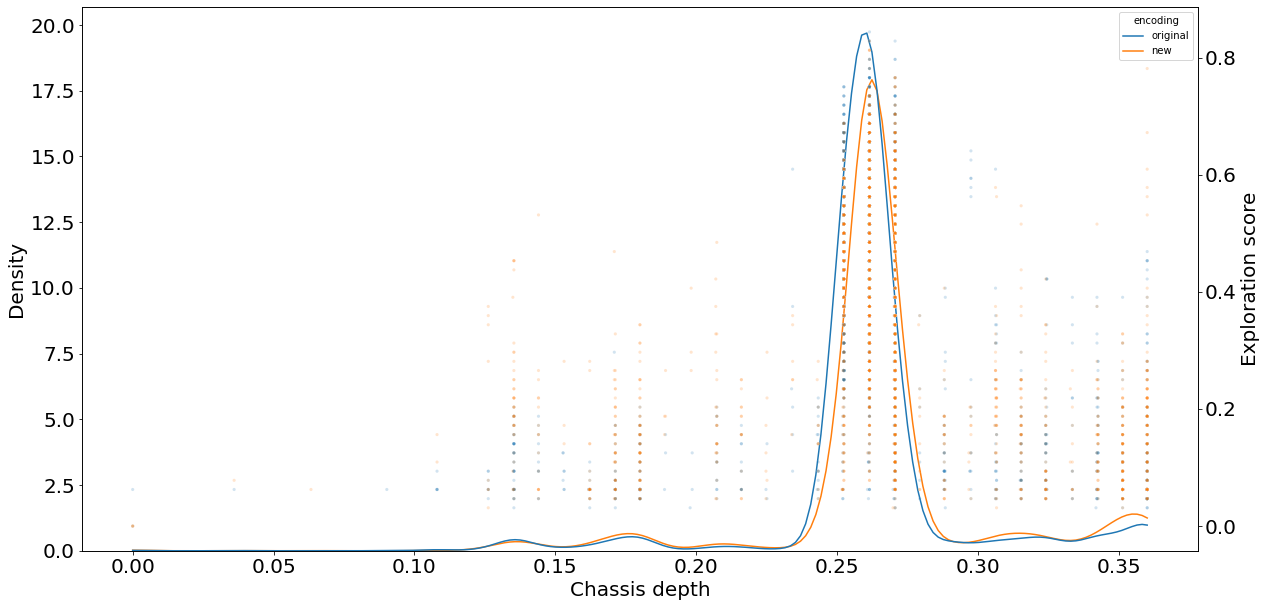

In [38]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="depth",hue="encoding",cut=0,hue_order=["original","new"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis depth")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="depth",y="fitness",hue="encoding",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["original","new"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

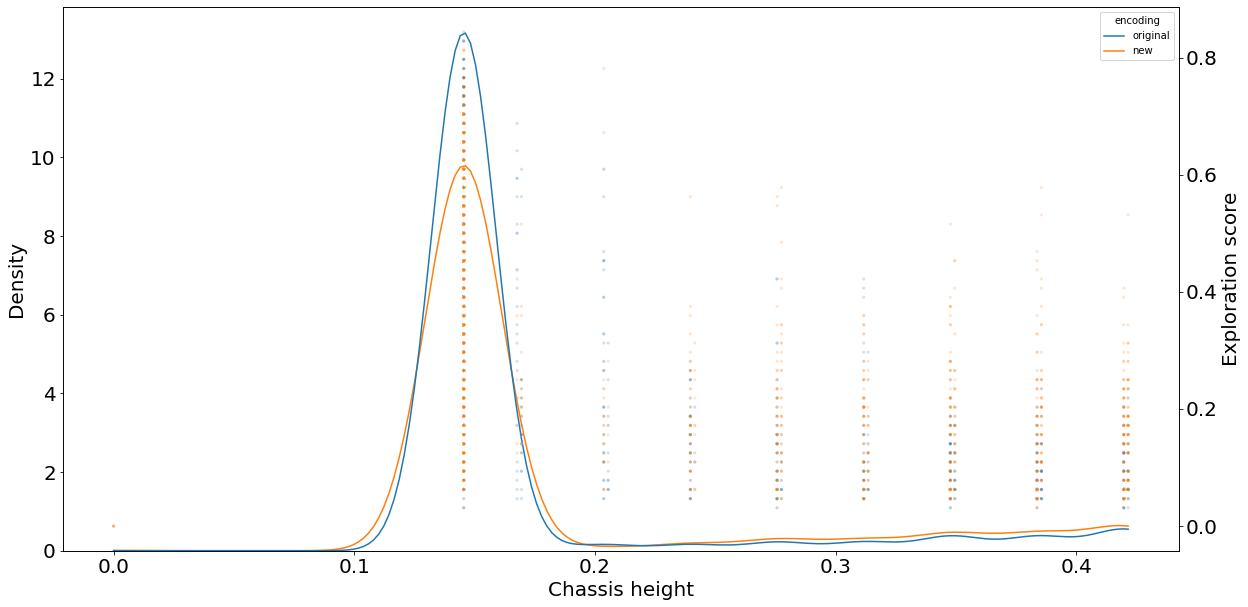

In [39]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="height",hue="encoding",cut=0,hue_order=["original","new"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis height")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="height",y="fitness",hue="encoding",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["original","new"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(1, -0.2, '−0.2'),
  Text(1, 0.0, '0.0'),
  Text(1, 0.2, '0.2'),
  Text(1, 0.4000000000000001, '0.4'),
  Text(1, 0.6000000000000001, '0.6'),
  Text(1, 0.8, '0.8'),
  Text(1, 1.0000000000000002, '1.0')])

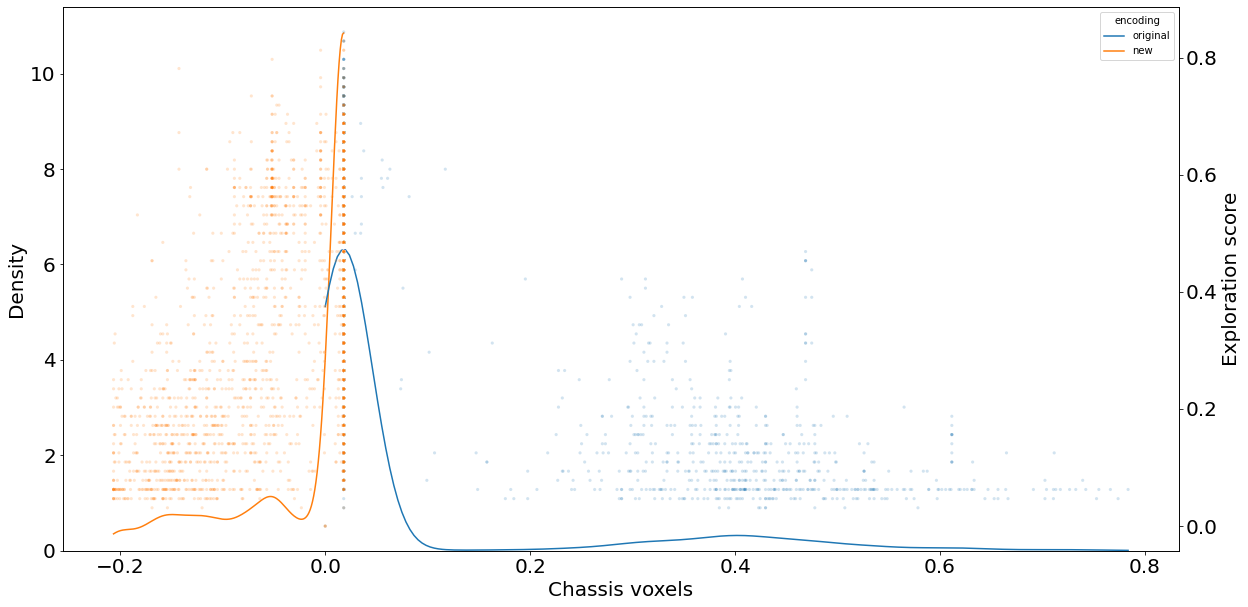

In [40]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.kdeplot(data=desc_data,x="voxels",hue="encoding",cut=0,hue_order=["original","new"])
ax.yaxis.label.set_size(20)
#plt.legend(["flat","terrain 1","terrain 2","terrain 3"],fontsize=20,loc=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(20)
ax.set_xlabel("Chassis voxels")
ax = plt.twinx()
sns.scatterplot(data=desc_data,x="voxels",y="fitness",hue="encoding",ax=ax,s=10,legend=False,alpha=0.2,hue_order=["original","new"])
ax.set_ylabel("Exploration score")
ax.yaxis.label.set_size(20)
plt.yticks(fontsize=20)